# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
        Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
        Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
        Its american tradition bitch
    2. Tokenized tweet
        Its , american , tradition , bitch

    3. Input tweet  
        @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
        @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , ... Then , louder , ones

    4. Input tweet
        " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
        " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

    5. Input tweet
        Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
        Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s, done , it , aga , .. , http://tinyurl.com/lb5p6m

    6. Input tweet
        @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
        @dialloc , congrats , on , finding , your , way , over , . , , , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

    7. Input tweet
        iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
        iPhone , activation , delays , continue , , , Apple , offers , $30 , http://twt.gs/l3Ki

    8. Input tweet
        RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
        RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , !!!weet

    9. Input tweet
        RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet   
        RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales/Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI
        
    10. Input tweet
        Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
        Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
        Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
        Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
        @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
        @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
        Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
        Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , (Tucson) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , .. , http://tinyurl.com/nz6xcv

    14. Input tweet
        Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
        Hey , @ginoandfran , please , greet , philip , ! , (GinoandFran , live , > , http://ustre.am/2YyQ)

    15. Input tweet
        Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk 
    15. Tokenized tweet
        Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk 


## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

implementation idea was taken from [here](https://medium.com/@adari.girishkumar/unraveling-the-byte-pair-encoding-bpe-algorithm-in-nlp-39f82e48608c)

In [74]:
from typing import List
from collections import Counter, defaultdict
import re

class BPETokenizer:
    """
    Byte Pair Encoding tokenizer.

    Attributes:
        vocab_size: The size of the vocabulary.
        vocab: The learned vocabulary.
    """

    def __init__(self, vocab_size: int) -> None:
        """
        Initialize the tokenizer.

        Args:
            vocab_size: The size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.vocab = Counter()

    def get_vocab(self, sent: str) -> None:
        """
        Update the vocabulary with the frequency of each word in the sentence.

        Args:
            sent: The sentence to process.
        """
        for word in sent.split():
            # Normalize the word and add it to the vocabulary
            self.vocab[" ".join(list(re.sub('\s\s+', ' ', word))) + ' </w>'] += 1
            
    def train(self, corpus: List[str]) -> None:
        """
        Train the tokenizer on a corpus.

        This method learns merges and builds the vocabulary.

        Args:
            corpus: The corpus to train on.
        """
        # Update the vocabulary with each sentence in the corpus
        for sent in corpus:
            self.get_vocab(sent)

        # Initialize the set of symbols
        self.symbols = set(list(' '.join(corpus)))

        # Learn merges until vocab_size is reached
        number_of_merges = self.vocab_size-len(self.symbols)        
        for i in range(number_of_merges):
            pairs = self.get_stats()
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            self.symbols.add(best_pair[0] + best_pair[1])
            self.merge_vocab(best_pair)

    def tokenize(self, text: str) -> List[str]:
        """
        Tokenize a text.

        This method tokenizes the text according to the learned merges.

        Args:
            text: The text to tokenize.

        Returns:
            The tokenized text.
        """
        current = ''
        tokens = []
        for i in text:
            if current + i in self.symbols: 
                current += i
                continue
            if (len(current.strip()) > 0): 
                tokens.append(current)
            current = i 

        return tokens

    def get_stats(self):
        """
        Get pairs of consecutive symbols in the vocabulary.

        Returns:
            A dictionary mapping pairs of symbols to their frequency.
        """
        pairs = defaultdict(int)
        for word, freq in self.vocab.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i+1]] += freq
        return pairs
    
    def merge_vocab(self, pair: List[str]) -> None:
        """
        Merge a pair of symbols in the vocabulary.

        Args:
            pair: The pair of symbols to merge.
        """
        new_vocab = {}
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        for word in self.vocab:
            new_word = word.replace(bigram, replacement)
            new_vocab[new_word] = self.vocab[word]
        self.vocab = new_vocab

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [75]:
# List to store the tweets
tweets = []

# Read tweets from each file
for files in range(5):
    with open(f'./data/file{files + 1}', 'r') as file:
        tweets.extend(file.readlines())

# Remove newline characters from the tweets
tweets = [tweet.strip() for tweet in tweets]

In [94]:
vocab_sizes = [0, 250, 500, 750, 1000]
average_lengths = []

for vocab_size in vocab_sizes:
    tokenizer = BPETokenizer(vocab_size)
    tokenizer.train(tweets)
    
    tokenized_tweets = [tokenizer.tokenize(tweet) for tweet in tweets]
    average_length = sum(len(tokens) for tokens in tokenized_tweets) / len(tweets)
    average_lengths.append(average_length)
    print("Trained tokenizer with vocab size:", vocab_size)

Trained tokenizer with vocab size: 0
Trained tokenizer with vocab size: 250
Trained tokenizer with vocab size: 500
Trained tokenizer with vocab size: 750
Trained tokenizer with vocab size: 1000


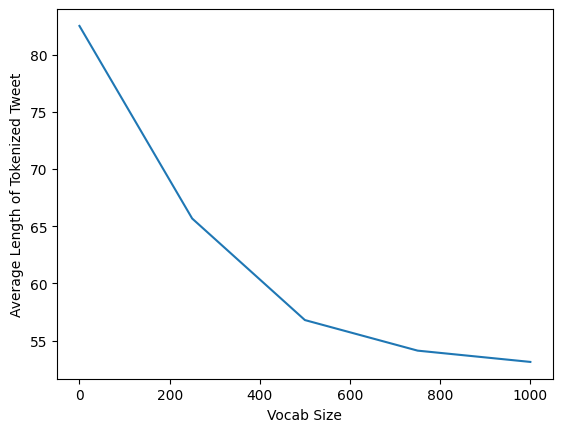

In [95]:
import matplotlib.pyplot as plt


plt.plot(vocab_sizes, average_lengths)
plt.xlabel('Vocab Size')
plt.ylabel('Average Length of Tokenized Tweet')
plt.show()

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

dataset was cropped and taken from [here](https://metatext.io/datasets/cc100-belarusian)

In [96]:
texts = []

with open('./data/cropped_texts.txt', 'r') as file:
    text = file.readlines()

texts = [line.strip() for line in text]

In [97]:
vocab_sizes = [0, 250, 500, 750, 1000]
average_lengths_txt = []

for vocab_size in vocab_sizes:
    tokenizer = BPETokenizer(vocab_size)
    tokenizer.train(text)
    
    tokenized_texts = [tokenizer.tokenize(text) for text in texts]
    average_length_txt = sum(len(tokens) for tokens in tokenized_texts) / len(texts)
    average_lengths_txt.append(average_length_txt)
    print("Trained tokenizer with vocab size:", vocab_size)

Trained tokenizer with vocab size: 0
Trained tokenizer with vocab size: 250
Trained tokenizer with vocab size: 500
Trained tokenizer with vocab size: 750
Trained tokenizer with vocab size: 1000


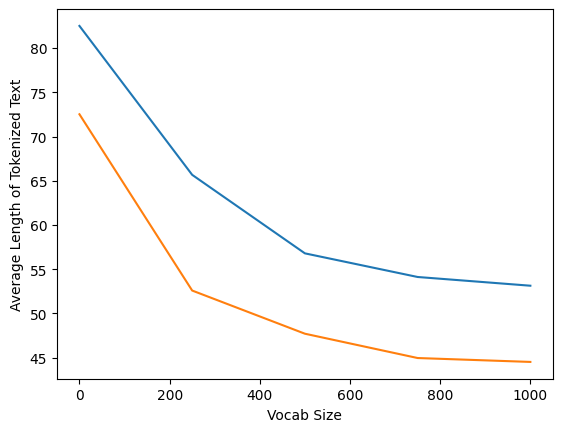

In [98]:
import matplotlib.pyplot as plt


plt.plot(vocab_sizes, average_lengths)
plt.plot(vocab_sizes, average_lengths_txt)
plt.xlabel('Vocab Size')
plt.ylabel('Average Length of Tokenized Text')
plt.show()

#### How the average length of the tokenized sentence differs from the average length of the tokenized tweet?

The average length of tokenized sentence is less than the average length of tokenized tweet. The cause of this is that the sentence on Lingla may contain shorter words and dont have a url, hashtags, user references, etc.